In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
datas = pd.read_excel('/Users/Rup/Downloads/GenderRatios-3.xlsx',sheet_name='Asia Pacific')
print(datas)

    Year  newYear     Ratios
0   1870         0  30.04064
1   1875         5  25.44332
2   1880        10  22.84131
3   1885        15  17.03670
4   1890        20  14.30141
5   1895        25  13.02516
6   1900        30  14.30075
7   1905        35  15.91014
8   1910        40  16.95668
9   1915        45  20.63757
10  1920        50  29.80620
11  1925        55  28.28355
12  1930        60  27.02677
13  1935        65  26.60637
14  1940        70  46.76110
15  1945        75  44.53684
16  1950        80  46.75366
17  1955        85  48.72198
18  1960        90  52.85789
19  1965        95  58.08843
20  1970       100  63.89221
21  1975       105  66.25009
22  1980       110  69.34769
23  1985       115  74.98585
24  1990       120  80.13951
25  1995       125  76.55644
26  2000       130  75.94535
27  2005       135  80.10808
28  2010       140  84.07307


In [2]:
X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values
x1 = X.reshape(-1, 1)
#print(X)
#print(x1)
#print(y)

In [3]:
# Fitting Linear Regression to the dataset...First try to fit the data with a linear model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Model initialization
lin_regression_model = LinearRegression()
# Fit the data(train the model)
lin_regression_model.fit(x1, y)
print('Slope of the line is', lin_regression_model.coef_)
print('Intercept value is', lin_regression_model.intercept_)
# Predict
y_predicted = lin_regression_model.predict(x1)
print(y_predicted)

print("\nEquation of the linear model is y = " ,lin_regression_model.coef_,"x","+", lin_regression_model.intercept_)
#
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


Slope of the line is [0.5367111]
Intercept value is 6.265904275862063
[ 6.26590428  8.94945978 11.63301529 14.3165708  17.00012631 19.68368181
 22.36723732 25.05079283 27.73434833 30.41790384 33.10145935 35.78501486
 38.46857036 41.15212587 43.83568138 46.51923689 49.20279239 51.8863479
 54.56990341 57.25345892 59.93701442 62.62056993 65.30412544 67.98768095
 70.67123645 73.35479196 76.03834747 78.72190298 81.40545848]

Equation of the linear model is y =  [0.5367111] x + 6.265904275862063
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     194.7
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           7.31e-14
Time:                        20:01:32   Log-Likelihood:                -102.73
No. Observations:              

In [4]:
#Calculate the performance of the model in terms of mean square error, root mean square error and r2 score.
# model evaluation
mse = mean_squared_error(y, y_predicted)
  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
  
# printing values
  
print('MSE of Linear model', mse)
  
print('R2 score of Linear model: ', r2)

print("\nThe performance of the linear model is not satisfactory. Let’s try Polynomial Regression with degree 2")

MSE of Linear model 69.90348963316457
R2 score of Linear model:  0.878218275055573

The performance of the linear model is not satisfactory. Let’s try Polynomial Regression with degree 2


In [5]:
# Fitting Polynomial Regression degree 2 to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_features.fit_transform(x1)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
print('Coefficients of x are', lin_reg.coef_)
print('Intercept is', lin_reg.intercept_)
print("This is the desired equation ",lin_reg.coef_[1],"x^2 + ",lin_reg.coef_[0],"x + ",lin_reg.intercept_)
y_deg2 = lin_reg.predict(x_poly)

model = sm.OLS(y, x_poly).fit()
ypred = model.predict(x_poly)
model.summary()


Coefficients of x are [0.04327024 0.00352458]
Intercept is 17.368323586206905
This is the desired equation  0.003524577558839631 x^2 +  0.043270243240284105 x +  17.368323586206905


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     418.8
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           4.75e-21
Time:                        20:01:32   Log-Likelihood:                -104.31
No. Observations:                  29   AIC:                             212.6
Df Residuals:                      27   BIC:                             215.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5306      0.083      6.362      0.000       0.359       0.702
x2             0.0007      0.001      0.893      0.380      -0.001       0.002
==============================================================================
Omnibus:                       18.019   Durbin-Watson:                   0.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.578
Skew:                           1.620   Prob(JB):                     2.06e-05
Kurtosis:                       5.712   Cond. No.                         442.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

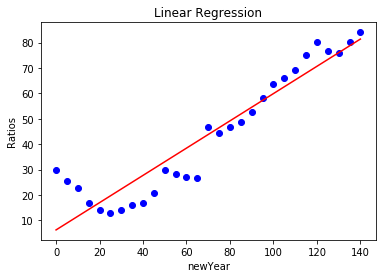

In [6]:
# Visualising the Linear Regression results
plt.scatter(x1, y, color = 'blue')

plt.plot(x1, y_predicted, color = 'red')
plt.title('Linear Regression')
plt.xlabel('newYear')
plt.ylabel('Ratios')

plt.show()


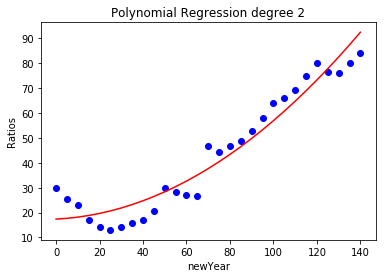

In [7]:
# Visualising the Polynomial Regression results
plt.scatter(x1, y, color = 'blue')

plt.plot(x1, y_deg2, color = 'red')
plt.title('Polynomial Regression degree 2')
plt.xlabel('newYear')
plt.ylabel('Ratios')

plt.show()




In [8]:
#Calculate the performance of the model obtained by Polynomial Regression.
y_deg2 = lin_reg.predict(x_poly)
# model evaluation
mse_deg2 = mean_squared_error(y, y_deg2)

r2_deg2 = r2_score(y, y_deg2)

# printing values

print('MSE of Polyregression model', mse_deg2)

print('R2 score of Linear model: ', r2_deg2)



MSE of Polyregression model 39.576702721861004
R2 score of Linear model:  0.9310518094250563


In [9]:
print("The performance of polynomial regression model is far better than linear regression model for the given quadratic equation.")

The performance of polynomial regression model is far better than linear regression model for the given quadratic equation.


In [10]:
# Fitting Polynomial Regression degree 3 to the dataset

poly_features1 = PolynomialFeatures(degree = 3, include_bias = False)
x_poly1 = poly_features1.fit_transform(x1)
lin_reg1 = LinearRegression()
lin_reg1.fit(x_poly1, y)
print('Coefficients of x are', lin_reg1.coef_)
print('Intercept is', lin_reg1.intercept_)


model1 = sm.OLS(y, x_poly1).fit()
ypred1 = model1.predict(x_poly1)
model1.summary()



Coefficients of x are [-1.06264375e+00  2.36234040e-02 -9.57086973e-05]
Intercept is 29.126137053658788


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     270.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.05e-19
Time:                        20:01:32   Log-Likelihood:                -104.25
No. Observations:                  29   AIC:                             214.5
Df Residuals:                      26   BIC:                             218.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4662      0.212      2.197      0.037       0.030       0.903
x2             0.0022      0.005      0.472      0.641      -0.007       0.012
x3         -7.932e-06    2.4e-05     -0.331      0.744   -5.73e-05    4.14e-05
==============================================================================
Omnibus:                       18.924   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.440
Skew:                           1.680   Prob(JB):                     8.13e-06
Kurtosis:                       5.847   Cond. No.                     1.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#Calculate the performance of the model obtained by Polynomial Regression degree 3.
y_deg3 = lin_reg1.predict(x_poly1)
# model evaluation
mse_deg3 = mean_squared_error(y, y_deg3)

r2_deg3 = r2_score(y, y_deg3)

# printing values

print('MSE of Polyregression model ', mse_deg3)

print('R2 score of Linear model: ', r2_deg3)



MSE of Polyregression model  9.675209586637523
R2 score of Linear model:  0.9831444221333899


In [12]:
a=np.array(150)
x_new = a.reshape(1, 1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
print(y_new)

[103.16185515]


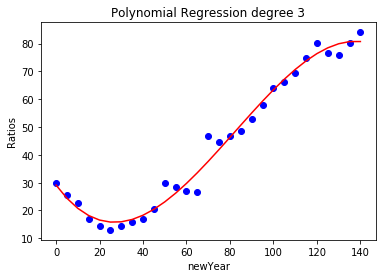

In [13]:
# Visualising the Polynomial Regression results of degree 3
plt.scatter(x1, y, color = 'blue')

plt.plot(x1, y_deg3, color = 'red')
plt.title('Polynomial Regression degree 3')
plt.xlabel('newYear')
plt.ylabel('Ratios')

plt.show()

In [14]:
# Fitting Polynomial Regression degree 4 to the dataset

poly_features2 = PolynomialFeatures(degree = 4, include_bias = False)
x_poly2 = poly_features2.fit_transform(x1)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly2, y)
print('Coefficients of x are', lin_reg2.coef_)
print('Intercept is', lin_reg2.intercept_)

model2 = sm.OLS(y, x_poly2).fit()
ypred2 = model2.predict(x_poly2)
model2.summary()




Coefficients of x are [-1.35392320e+00  3.33723088e-02 -2.05256374e-04  3.91241701e-07]
Intercept is 30.84271001726353


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     233.7
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.08e-19
Time:                        20:01:32   Log-Likelihood:                -101.68
No. Observations:                  29   AIC:                             211.4
Df Residuals:                      25   BIC:                             216.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2231      0.397      3.082      0.005       0.406       2.040
x2            -0.0297      0.015     -1.966      0.061      -0.061       0.001
x3             0.0004      0.000      2.140      0.042    1.45e-05       0.001
x4         -1.472e-06   6.69e-07     -2.201      0.037   -2.85e-06   -9.48e-08
==============================================================================
Omnibus:                       24.685   Durbin-Watson:                   0.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.564
Skew:                           1.992   Prob(JB):                     2.56e-09
Kurtosis:                       7.107   Cond. No.                     3.35e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#Calculate the performance of the model obtained by Polynomial Regression degree 4.
y_deg4 = lin_reg2.predict(x_poly2)
# model evaluation
mse_deg4 = mean_squared_error(y, y_deg4)

r2_deg4 = r2_score(y, y_deg4)

# printing values

print('MSE of Polyregression model ', mse_deg4)

print('R2 score of Linear model: ', r2_deg4)




MSE of Polyregression model  9.020884244168501
R2 score of Linear model:  0.9842843490426029


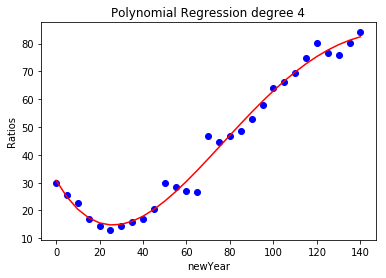

In [16]:
# Visualising the Polynomial Regression results of degree 4
plt.scatter(x1, y, color = 'blue')

plt.plot(x1, y_deg4, color = 'red')
plt.title('Polynomial Regression degree 4')
plt.xlabel('newYear')
plt.ylabel('Ratios')

plt.show()

In [17]:
# predicting the gender ratio in 2020
a=np.array(150)
x_new = a.reshape(1, 1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
print(y_new)

[103.16185515]


In [18]:
# Fitting Polynomial Regression degree 5 to the dataset

poly_features3 = PolynomialFeatures(degree = 5, include_bias = False)
x_poly3 = poly_features3.fit_transform(x1)
lin_reg3 = LinearRegression()
lin_reg3.fit(x_poly3, y)
print('Coefficients of x are', lin_reg3.coef_)
print('Intercept is', lin_reg3.intercept_)

model3 = sm.OLS(y, x_poly3).fit()
ypred3 = model3.predict(x_poly3)
model3.summary()


Coefficients of x are [-1.45025412e+00  3.85269537e-02 -3.05865572e-04  1.20620531e-06
 -2.32846746e-09]
Intercept is 31.183248478653017


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     210.8
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           5.22e-19
Time:                        20:01:33   Log-Likelihood:                -99.405
No. Observations:                  29   AIC:                             208.8
Df Residuals:                      24   BIC:                             215.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.3119      0.657      3.521      0.002       0.957       3.667
x2            -0.1013      0.038     -2.651      0.014      -0.180      -0.022
x3             0.0019      0.001      2.471      0.021       0.000       0.003
x4         -1.422e-05   6.34e-06     -2.241      0.035   -2.73e-05   -1.12e-06
x5          3.735e-08   1.85e-08      2.019      0.055   -8.33e-10    7.55e-08
==============================================================================
Omnibus:                       30.683   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.629
Skew:                           2.287   Prob(JB):                     3.40e-15
Kurtosis:                       8.851   Cond. No.                     7.57e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#Calculate the performance of the model obtained by Polynomial Regression degree 5.
y_deg5 = lin_reg3.predict(x_poly3)
# model evaluation
mse_deg5 = mean_squared_error(y, y_deg5)

r2_deg5 = r2_score(y, y_deg5)

# printing values

print('MSE of Polyregression model ', mse_deg5)

print('R2 score of Linear model: ', r2_deg5)






MSE of Polyregression model  8.991035999137974
R2 score of Linear model:  0.9843363488896127


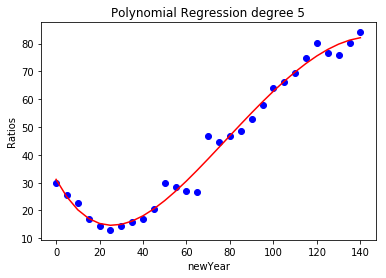

In [20]:
# Visualising the Polynomial Regression results of degree 5
plt.scatter(x1, y, color = 'blue')

plt.plot(x1, y_deg5, color = 'red')
plt.title('Polynomial Regression degree 5')
plt.xlabel('newYear')
plt.ylabel('Ratios')

plt.show()

In [21]:
#As we see polynomial linear regression R^2 value and MSE is the best model , we try to predict the ratio for 2010 from this model

a=np.array(150)
x_new = a.reshape(1, 1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
print(y_new)

[103.16185515]
